# **Creating visualizations using Matplotib, Seaborn and Folium** 

Below is a final assignment lab from the IBM Data Science Certification that I completed. It displays some of the data visualization python skills that I learned over the course of the certification. This lab was reformmatted but originated from the IBM Coursework.

# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


# Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries


In [1]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

Below I will be creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, we can gain insights into how recessions impacted automobile sales for our company.


---


# Importing Data


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### Developing a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


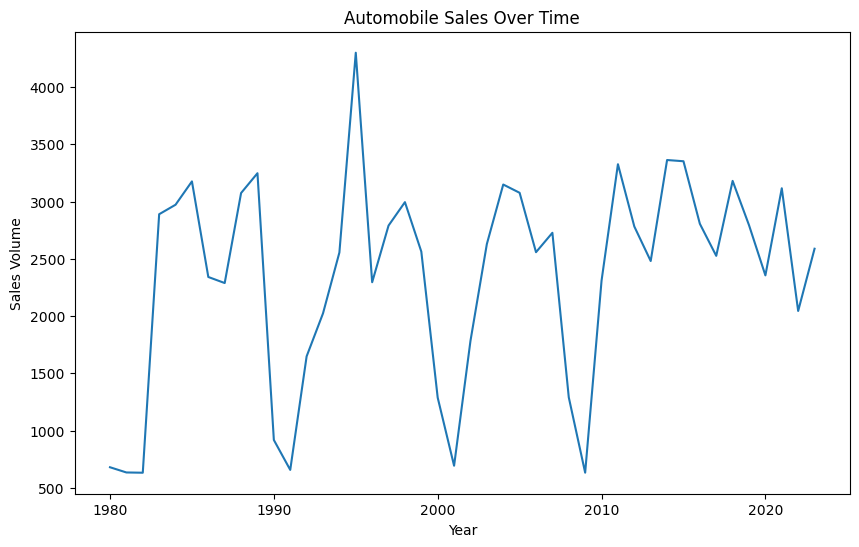

In [7]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.show()



It looks good, now that we have a visual of when recessions hit, we can annotate those dips and add additional tick marks to make it easier to pin point the exact dates of these recessions.

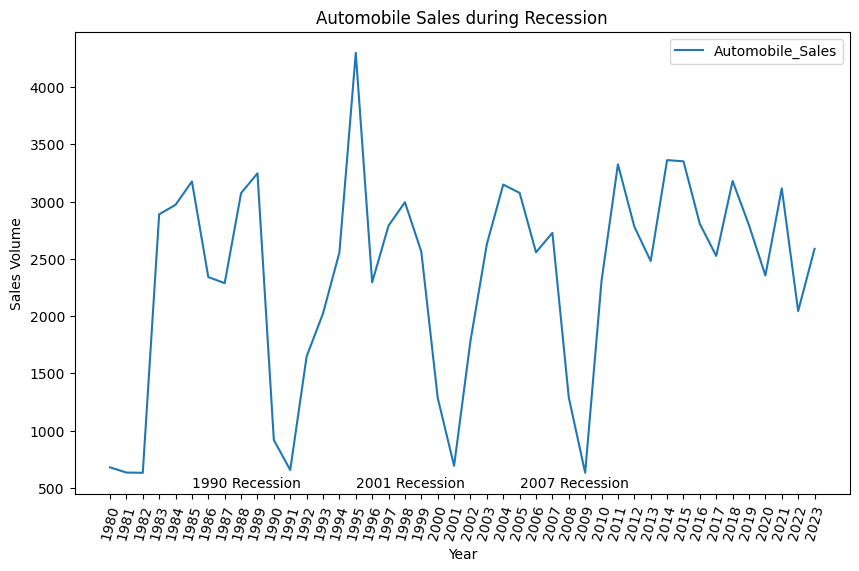

In [8]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xticks(list(range(1980,2024)),rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')

plt.text(1985,500,'1990 Recession')
plt.text(1995,500,'2001 Recession')
plt.text(2005,500,'2007 Recession')
plt.legend()
plt.show()

---



### Next, let's plot different lines for categories of vehicle type and analyse the trend to answer the question - Is there a noticeable difference in sales trends between different vehicle types during recession periods?


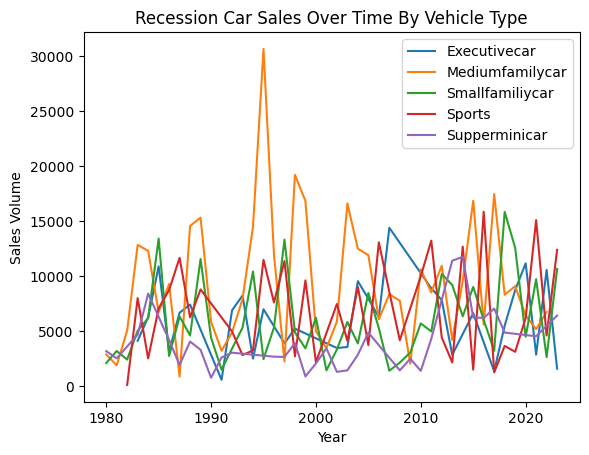

In [9]:
df_car_type = df.groupby(['Year','Vehicle_Type'], as_index = False)['Automobile_Sales'].sum()
df_car_type.set_index('Year', inplace=True)
df_car_type = df_car_type.groupby(['Vehicle_Type'])['Automobile_Sales']

df_car_type.plot(kind='line')
plt.title('Recession Car Sales Over Time By Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


From this plot, we can understnad that during the recession periods, sales for "Sports" type vehicles declines because of the high costs of the vichile. Meanwhile, sales of the super mini car and small family car increased, like due to the lower cost of these types of vehicles.

----


## Next, let's create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


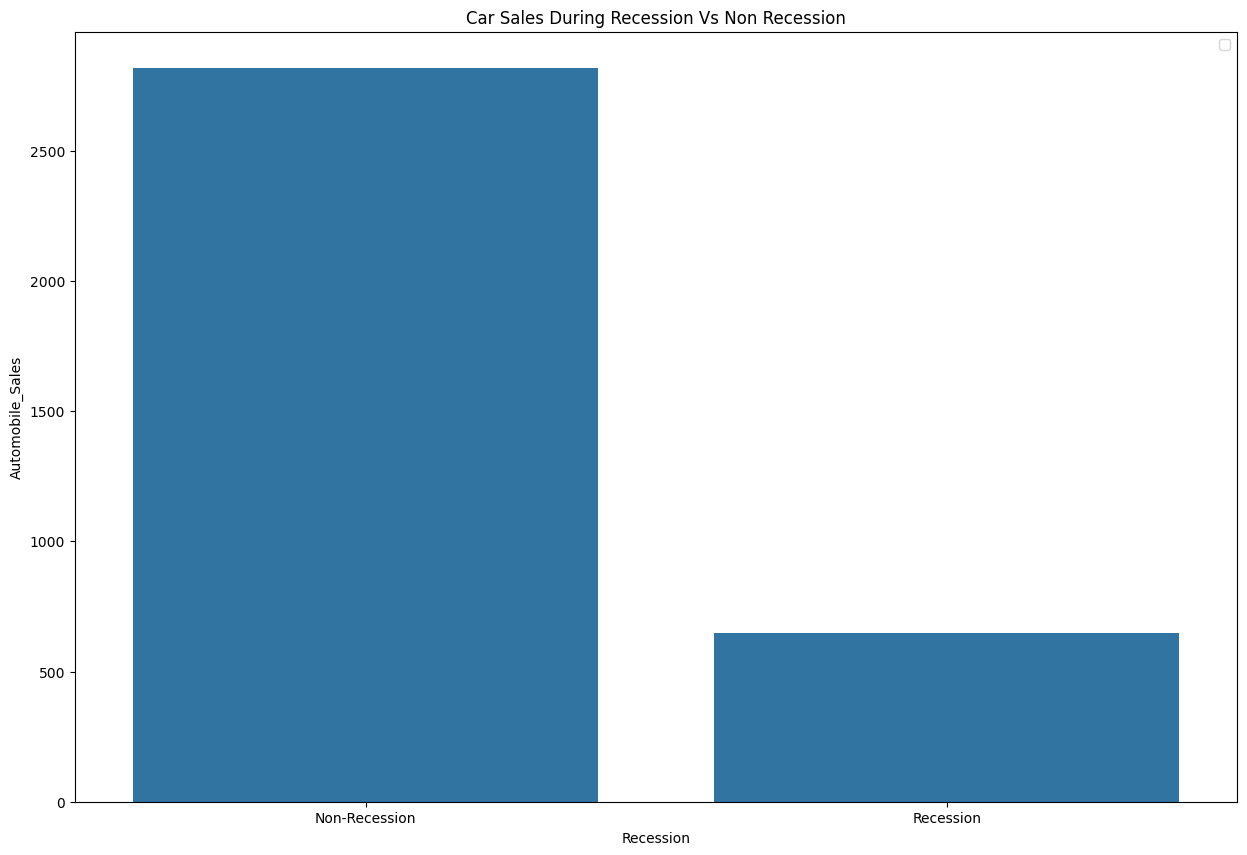

In [10]:
df_bar = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x='Recession',y='Automobile_Sales',data=df_bar)
plt.xlabel=('Recession')
plt.ylabel=('Sales')
plt.title('Car Sales During Recession Vs Non Recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession','Recession'])
plt.legend()
plt.show()

### Now that we see the difference in sales between a recession period and a non-recession period, let's take a look at how sales of different vehicle types during a recession and a non-recession period

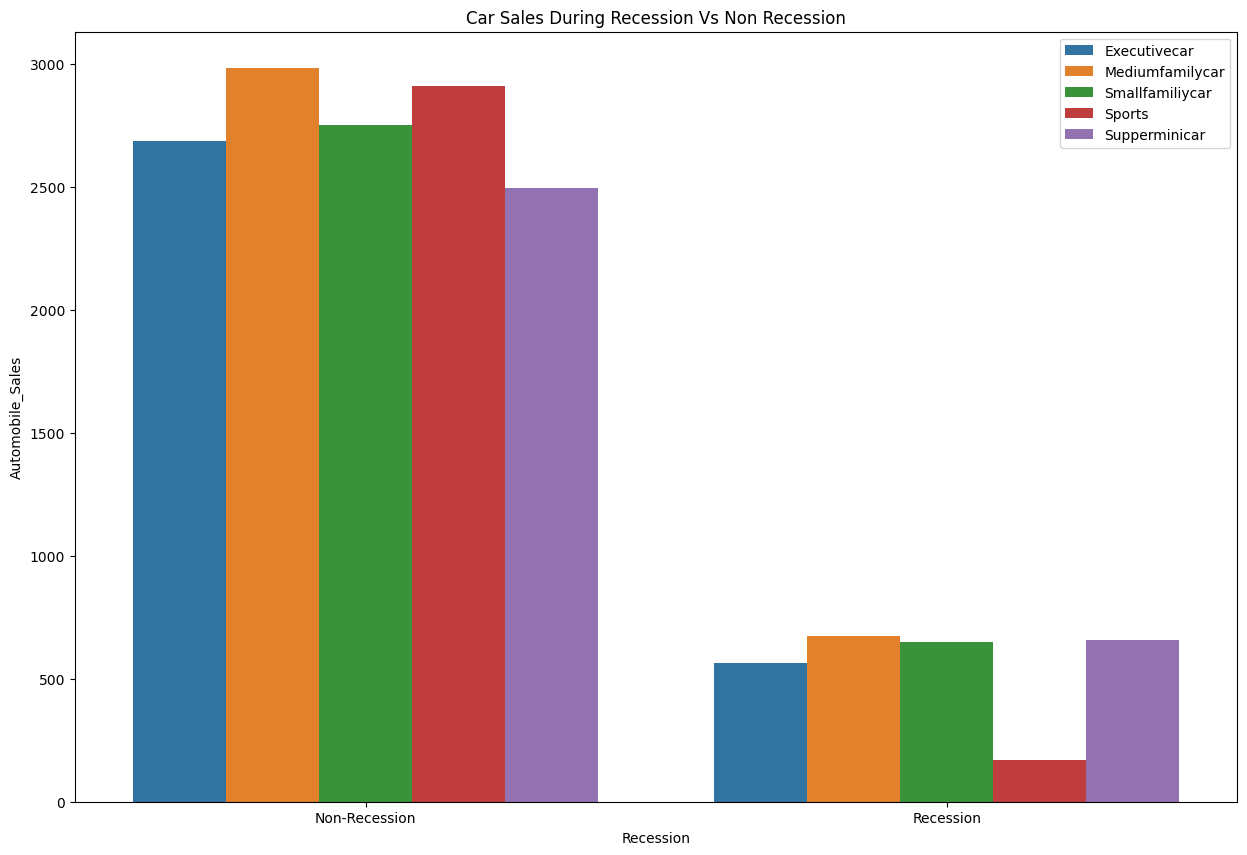

In [11]:
recession_data = df[df['Recession'] ==1]

df_bar = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x='Recession',y='Automobile_Sales', hue='Vehicle_Type',data=df_bar)
plt.xlabel=('Period')
plt.ylabel=('Average Sales')
plt.title('Car Sales During Recession Vs Non Recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession','Recession'])
plt.legend()
plt.show()


Based on this chart, it is clear that the sales for all types of vehicles decrease significantly during a recession compared to non-recession times. The most greatly impacted vehicle types are the sports car and the executive car.

---


### Next, let's make use of sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


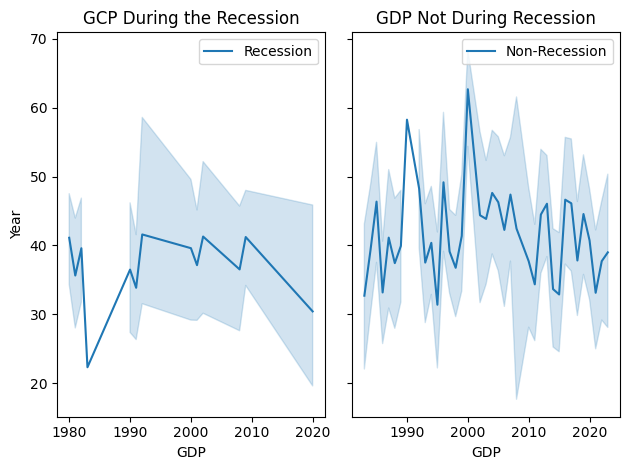

In [12]:
rec_data = df[df['Recession']==1]
non_rec_data = df[df['Recession']==0]

fig, (ax0, ax1) = plt.subplots(1,2, sharey=True)

sns.lineplot(x='Year', y='GDP', data=rec_data, label = 'Recession', ax=ax0)
ax0.set_title('GCP During the Recession')
ax0.set_xlabel('GDP')
ax0.set_ylabel('Year')

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label = 'Non-Recession',ax=ax1)
ax1.set_title('GDP Not During Recession')
ax1.set_xlabel('GDP')
ax1.set_ylabel('Year')

plt.tight_layout()
plt.show()

### From this plot, it is clear that during recession, the GDP of the country was in a low range.

---


### Bubble plots are like a scatter plot, but can display up to 3 dimensions of data. Let's use a bubble plot to display the impact of seasonality on Automobile Sales. This will help us see which months sales are high or low. We'll remove the recession data from this view to make sure we are only viewing seasonality without the impact of the recession. 



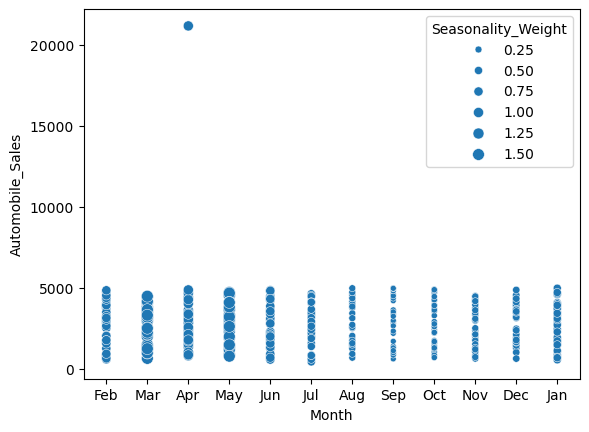

<class 'TypeError'>: 'str' object is not callable

In [13]:

non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight']

sns.scatterplot(data=non_rec_data, x='Month', y ='Automobile_Sales', size = size)
plt.xlabel('Month')
plt.label('Automobile_Sales')
plt.title('Seasonality in Automobile Sales')


### From this plot, it is evident that seasonality has not affected on the overall sales. However, there is one drastic raise in sales in the month of April

---


 ### Next let's take a look at how Consumer Confidence impacts automobile sales during the recession. We will do this using a scatterplot to identify whether there is a correlation between the 2.


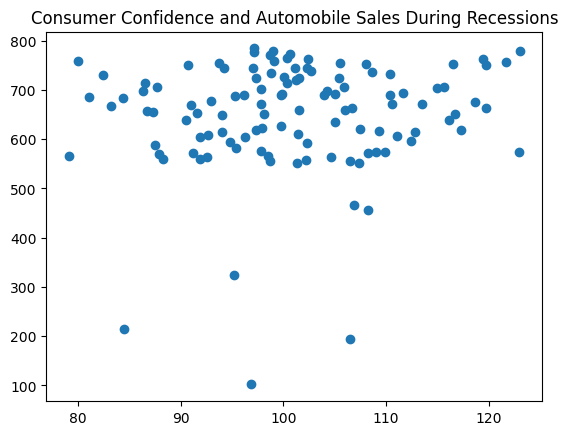

In [14]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.title('Consumer Confidence and Automobile Sales During Recessions')
plt.ylabel=('Consumer Confidence')
plt.ylabel=('Automobile Sales')

plt.show()


 ### There doesn't seem to be a clear correlation, let's see if average car price has more of an impact on sales during the recession.



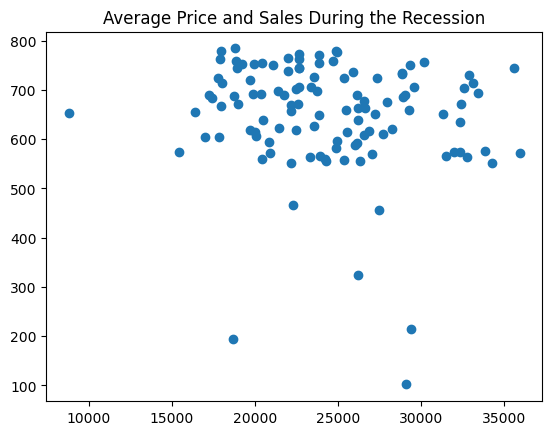

In [15]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.title('Average Price and Sales During the Recession')
plt.ylabel=('Average Price')
plt.ylabel=('Automobile Sales')

plt.show()

### Surprising to see there is not much correlation there, either!


----


 ### Next lets create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.Using this, we will see how the recessions impacted advertising expenditure. 


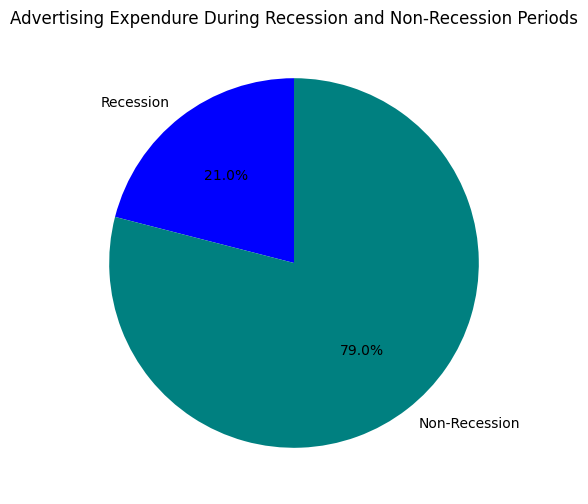

In [28]:
df_rec_ads= df[df['Recession'] == 1]
df_non_rec_ads= df[df['Recession'] == 0]

rec_ads_total= df_rec_ads['Advertising_Expenditure'].sum()
non_rec_ads_total = df_non_rec_ads['Advertising_Expenditure'].sum()

plt.figure(figsize=(8,6))

labels=['Recession','Non-Recession']
sizes=[rec_ads_total,non_rec_ads_total]
colors=['blue','teal']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors)
plt.title('Advertising Expendure During Recession and Non-Recession Periods')
plt.show()

#### From the above plot it looks like there is far more spend on advertising during non-recession periods compared to recession periods. This makes sense!


---


### Now let's dig in deeper into how they are spending those advertising dollars during the recession periods. To do so, we'll develop a pie chart to display the total advertisement expenditure for each vehicle type during recession period.

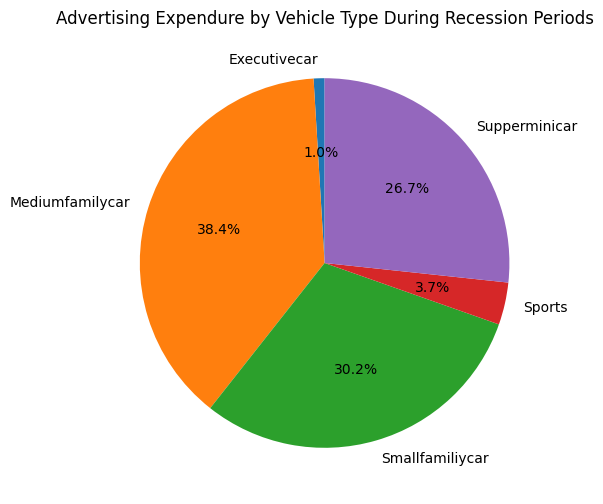

In [34]:
recession_data = df[df['Recession'] ==1]

df_rec_pie = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()


plt.figure(figsize=(8,6))

labels=df_rec_pie.index
sizes=df_rec_pie.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Advertising Expendure by Vehicle Type During Recession Periods')
plt.show()

### It looks like they focused their advertising dollars on cars with a lower price range during recession periods. This makes sense, since people are less likely to buy an expensive car during times of economic trouble. 



----


 ### Next, let's take a look at the effect of the unemployment rate on vehicle type and sales during the Recession Period.


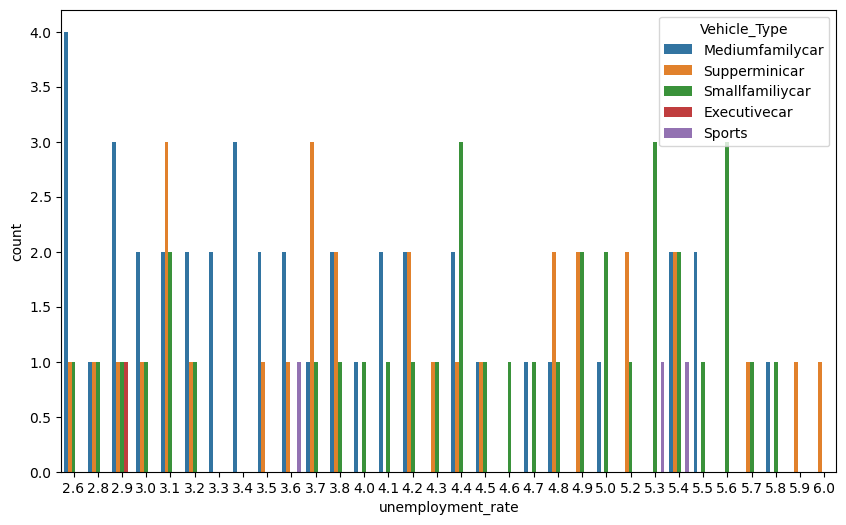

<class 'TypeError'>: 'str' object is not callable

In [37]:
rec_data = df[df['Recession'] ==1]

plt.figure(figsize=(10,6))

sns.countplot(data=rec_data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Sales by Type')
plt.legend(loc='upper right')
plt.show()

#### From the plot above, we can see that sales for superminicars and smallfamily cars remain high as unemployment rates raise up. Sports cars and executivecars also appear to drop more the higher unemployment gets.


---


### Finally, let's take a look at how sales were impacted regionally during the recession. To do so, we will create a map on the hightest sales region/offices of the company during recession period.

In [38]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [40]:
    recession_data = df[df['Recession'] == 1]

    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    map1

Copyright © 2023 IBM Corporation. All rights reserved.
